## Titanic Survival Prediction

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Data analysis and understanding

In [2]:
# reading the data 

titanic_ship = pd.read_csv('/Users/arqavan/Downloads/Titanic-Dataset.csv')
titanic_ship.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic_ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_ship.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# make a copy from dataset
titanic = titanic_ship.copy()

In [8]:
# drop some of the columns 

titanic.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [9]:
# check the missing values
missing_values = titanic[['Age', 'Fare']].isnull().sum()
print("\nmissing values:")
print(missing_values)


missing values:
Age     177
Fare      0
dtype: int64


In [10]:
# check for null values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Age

In [11]:
((titanic['Age'].isnull().sum())/len(titanic))*100

19.865319865319865

In [12]:
#find correlation

corrleation=titanic['Age'].corr(titanic['Survived'])
print(corrleation)

-0.07722109457217756


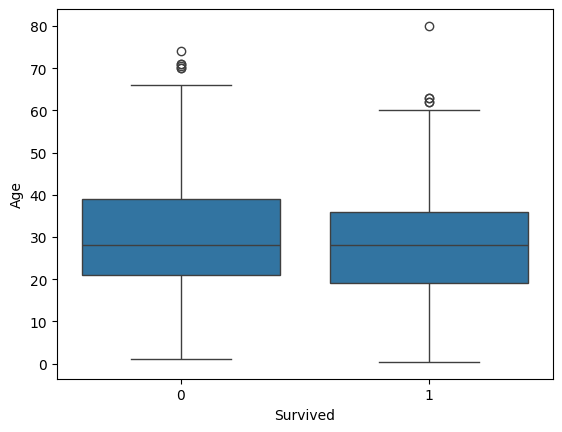

In [13]:
sns.boxplot(x=titanic['Survived'],y=titanic['Age'],)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

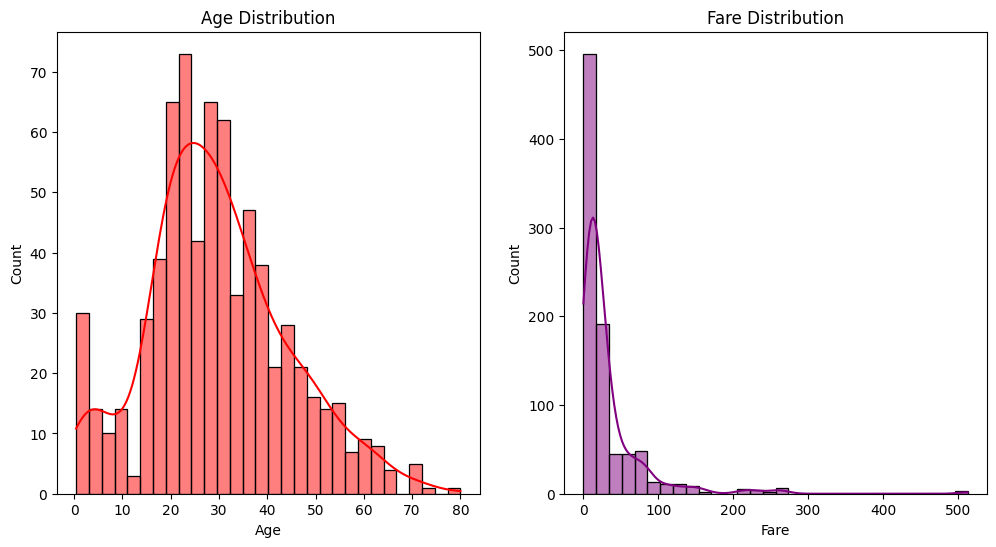

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, ax=ax1, color='red')
sns.histplot(titanic['Fare'], bins=30, kde=True, ax=ax2, color='purple')
ax1.set_title('Age Distribution')
ax2.set_title('Fare Distribution')
plt.show()

In [15]:
categorical_features = titanic.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')


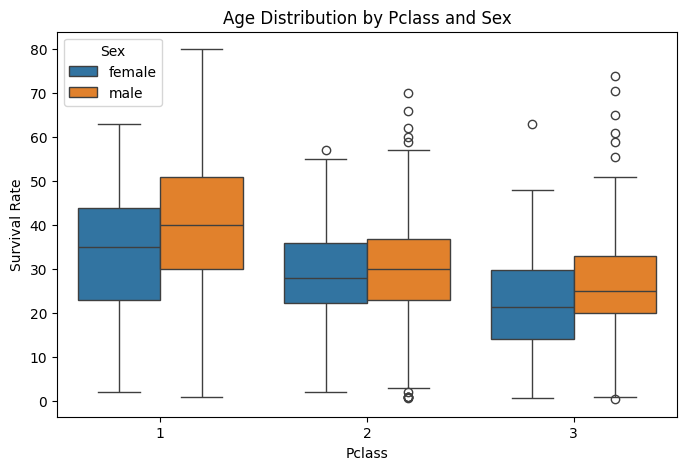

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=titanic)
plt.title("Age Distribution by Pclass and Sex")
plt.ylabel("Survival Rate")
plt.show()

we see the age varies with 

we see more males than females in each classes

so better not to fill the null values by taking median as whole lets fill Age based on median based on (Pclass and Sex)

In [17]:
titanic['Age']=titanic.groupby(['Pclass','Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [18]:
titanic['Age'].isnull().sum()

0

## Cabine

In [19]:
titanic['Cabin'].isnull().sum()

687

In [20]:
((titanic['Cabin'].isnull().sum())/len(titanic))*100

77.10437710437711

it has 77% of data as null values and being a categorical value it may not be useful in to predict Survive

best option drop the column

In [21]:
titanic.drop(columns=['Cabin'],inplace=True)

## Embarked

In [22]:
titanic = titanic.dropna(subset=['Embarked'])


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


##  Data Exploration

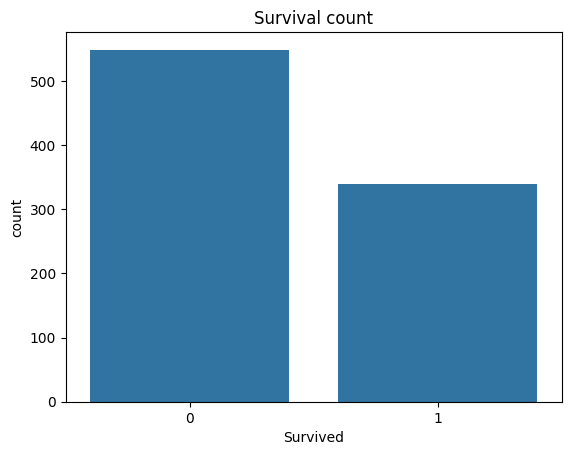

In [24]:
sns.countplot(data=titanic,x='Survived')
plt.title('Survival count')
plt.show()

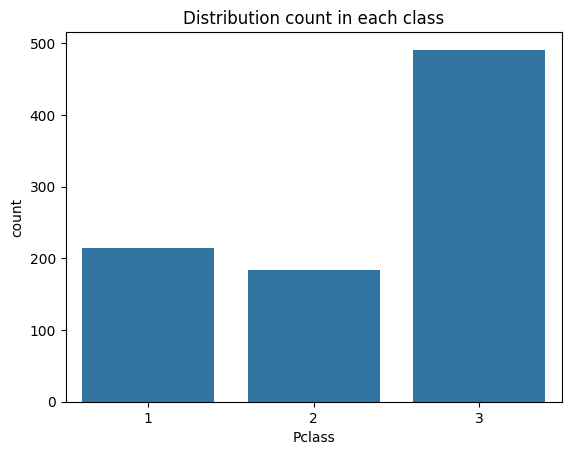

In [25]:
sns.countplot(data=titanic,x='Pclass')
plt.title("Distribution count in each class")
plt.show()

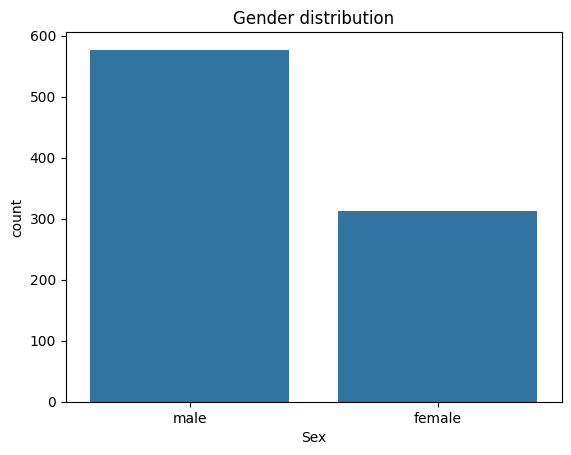

In [26]:
sns.countplot(x='Sex',data=titanic)
plt.title("Gender distribution")
plt.show()

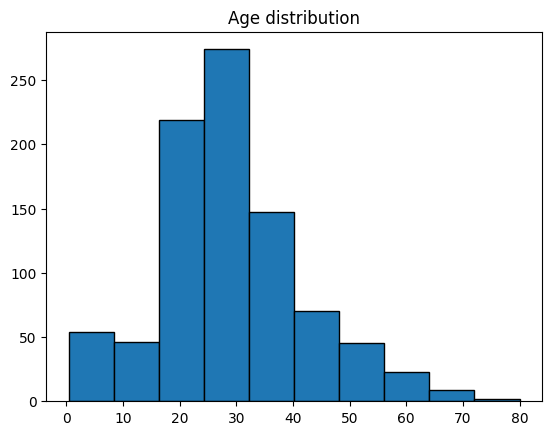

In [27]:
plt.hist(x='Age',data=titanic,edgecolor='black')
plt.title('Age distribution')
plt.show()

In [28]:
titanic['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

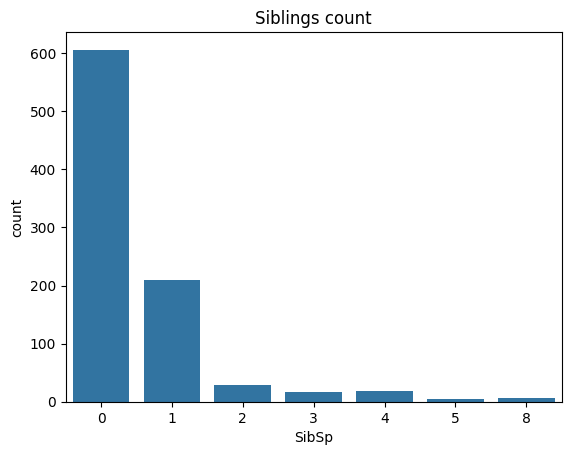

In [29]:
sns.countplot(x='SibSp',data=titanic)
plt.title("Siblings count")
plt.show()

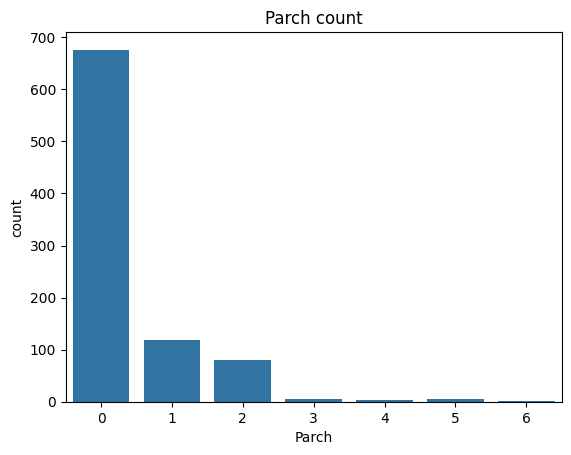

In [30]:
sns.countplot(x='Parch',data=titanic)
plt.title("Parch count")
plt.show()

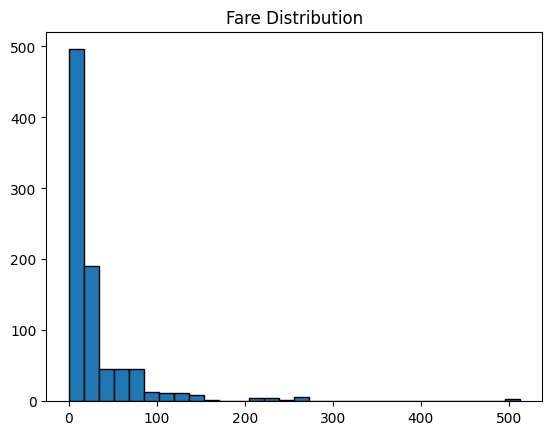

In [31]:
plt.hist(x="Fare",data=titanic,edgecolor="black",bins=30)
plt.title("Fare Distribution")
plt.show()

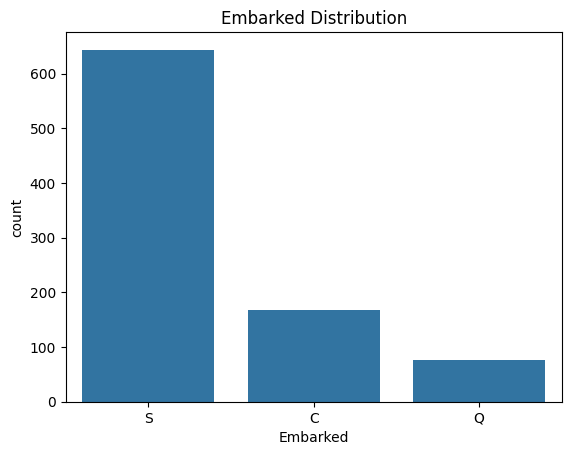

In [32]:
sns.countplot(x="Embarked",data=titanic)
plt.title("Embarked Distribution")
plt.show()

## Survival vs other features¶

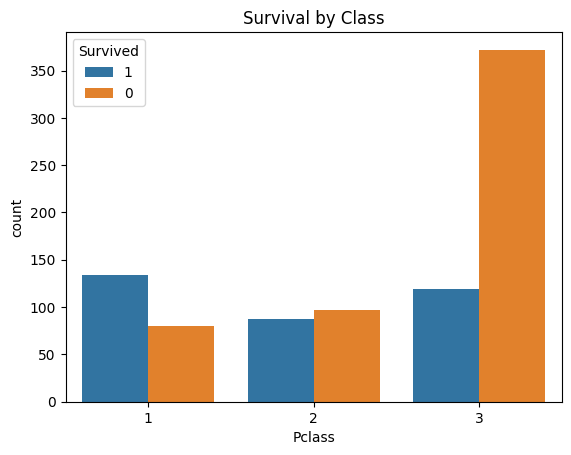

In [33]:
titanic['Survived'] = titanic['Survived'].astype(str)

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Class')
plt.show()

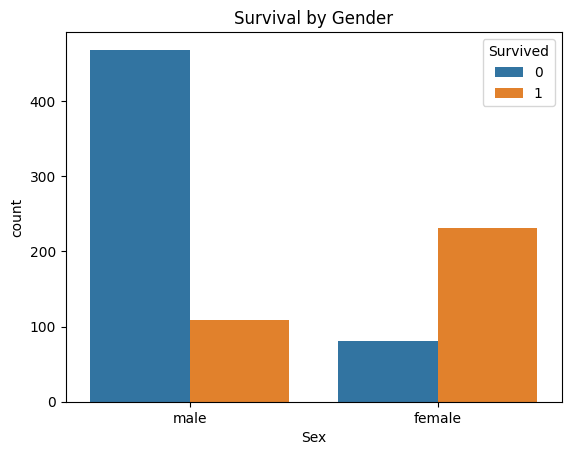

In [34]:
titanic['Survived'] = titanic['Survived'].astype(str)

sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender')
plt.show()


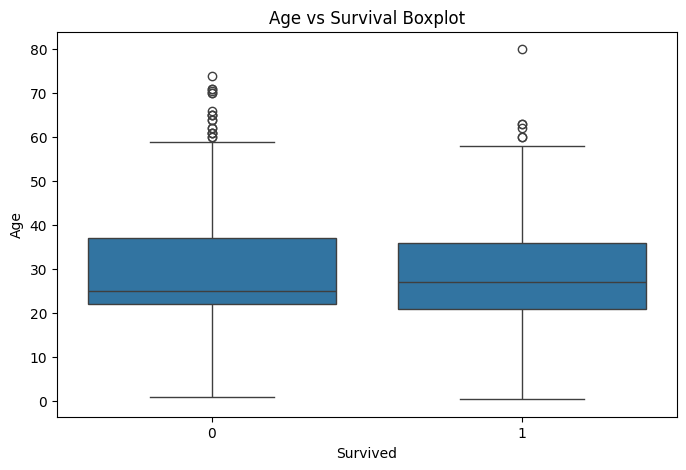

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title("Age vs Survival Boxplot")
plt.show()

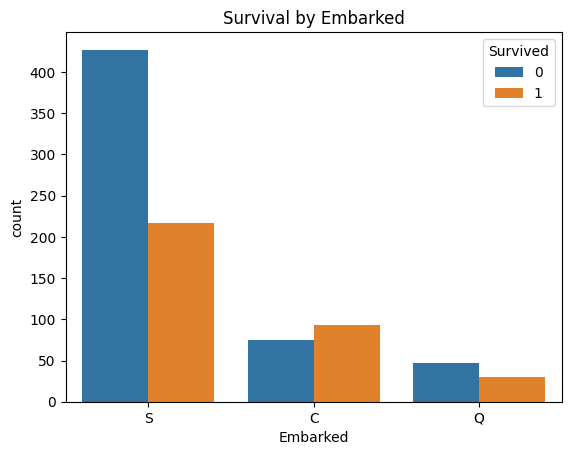

In [36]:
sns.countplot(x='Embarked',hue='Survived',data=titanic)
plt.title('Survival by Embarked')
plt.show()

In [37]:
titanic['Survived'] = titanic['Survived'].astype(int)  

titanic.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

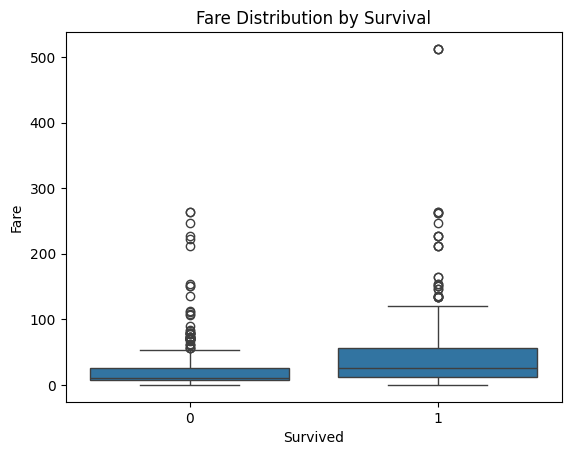

In [38]:
sns.boxplot(x="Survived", y="Fare", data=titanic)
plt.title("Fare Distribution by Survival")
plt.show()

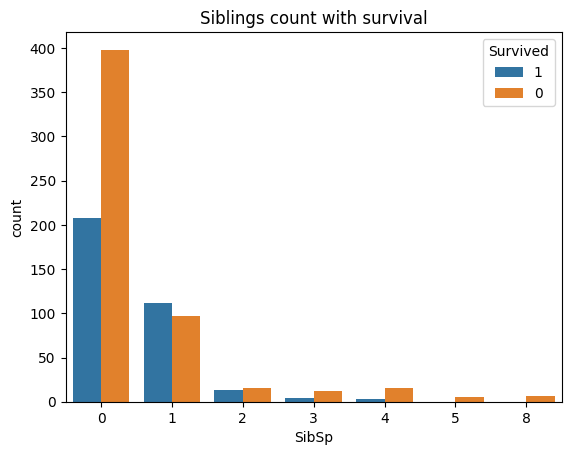

In [39]:
titanic['Survived'] = titanic['Survived'].astype(str)

sns.countplot(x='SibSp',hue='Survived',data=titanic)
plt.title('Siblings count with survival')
plt.show()

## Correlation Analysis

In [40]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})


In [41]:
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [42]:
titanic['Survived'] = titanic['Survived'].astype(int)
titanic["Embarked_Q"] = titanic["Embarked_Q"].astype(int)
titanic["Embarked_S"] = titanic["Embarked_S"].astype(int)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_Q  889 non-null    int64  
 8   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [44]:
print(titanic.dtypes)

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q      int64
Embarked_S      int64
dtype: object


In [45]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [46]:
print(titanic.corr())

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.335549  0.541585 -0.064411 -0.034040  0.083151   
Pclass     -0.335549  1.000000 -0.127741 -0.410697  0.081656  0.016824   
Sex         0.541585 -0.127741  1.000000 -0.108119  0.116348  0.247508   
Age        -0.064411 -0.410697 -0.108119  1.000000 -0.249161 -0.174541   
SibSp      -0.034040  0.081656  0.116348 -0.249161  1.000000  0.414542   
Parch       0.083151  0.016824  0.247508 -0.174541  0.414542  1.000000   
Fare        0.255290 -0.548193  0.179958  0.119859  0.160887  0.217532   
Embarked_Q  0.004536  0.220558  0.075217 -0.091680 -0.026692 -0.081585   
Embarked_S -0.151777  0.076466 -0.121405  0.020047  0.069438  0.061512   

                Fare  Embarked_Q  Embarked_S  
Survived    0.255290    0.004536   -0.151777  
Pclass     -0.548193    0.220558    0.076466  
Sex         0.179958    0.075217   -0.121405  
Age         0.119859   -0.091680    0.020047  
SibSp       0.160887   -

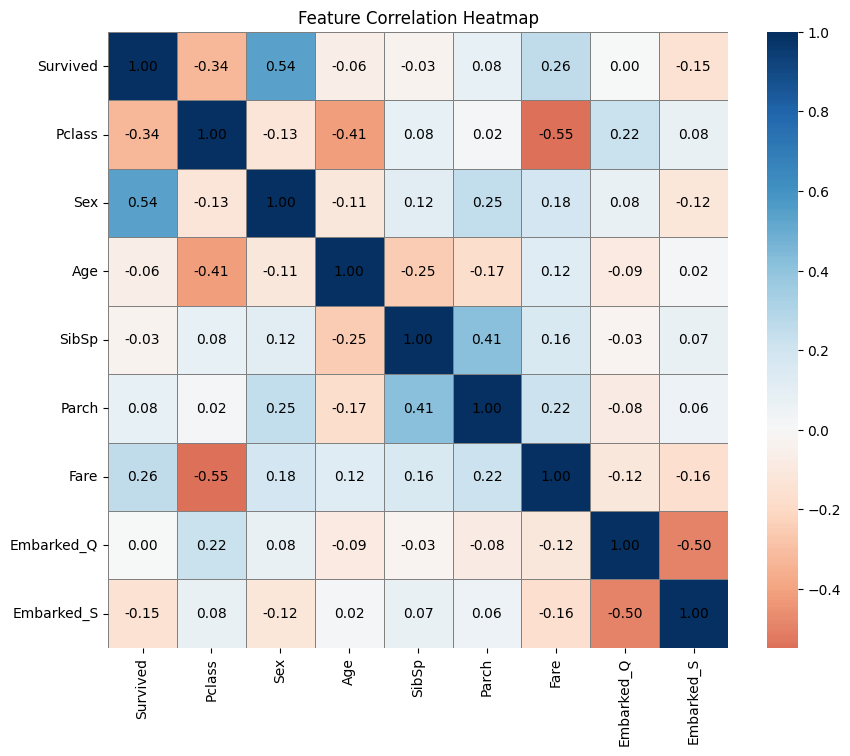

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(
    titanic.corr(),
    annot=True,
    cmap="RdBu",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"color": "black", "size": 10}
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [50]:
titanic.to_csv("cleaned_titanic_data.csv", index=False)